In [ ]:
# Run this cell to mount your drive to this notebook in order to read the datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [ ]:
# Put the folder path where the datasets are located
PATH = "/content/drive/My Drive/"

In [ ]:
# Read the train and test set with read_csv() method of pandas
train = pd.read_csv(PATH + "train.csv")
test = pd.read_csv(PATH + "test.csv")

In [ ]:
print(train.shape)
train.head()

(18000, 3)


,Unnamed: 0,text,label
0,0,I came here and left a review before but last ...,1
1,1,Had a very nice first visit here. The owner Te...,4
2,2,This is a gorgeous and very clean hotel. We h...,4
3,3,The gym is dirty. I have given up. Locker ro...,1
4,4,"The food here is delicious, fast, and consiste...",5


In [ ]:
print(test.shape)
test.head()

(2000, 3)


,Unnamed: 0,text,label
0,0,I stayed here for a weekend and they made my s...,5
1,1,I will forever be calling upon Delicious Desig...,5
2,2,I personally had only ordered the Homicide bon...,4
3,3,We eat here pretty much everytime we go to Tar...,4
4,4,I've been here about 3 times. I never go when ...,3


In [ ]:
train.describe()

,Unnamed: 0,label
count,18000.000000,18000.000000
mean,8999.500000,2.994722
std,5196.296758,1.412376
min,0.000000,1.000000
25%,4499.750000,2.000000
50%,8999.500000,3.000000
75%,13499.250000,4.000000
max,17999.000000,5.000000


### Preprocess Dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
from nltk import word_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
type(train.text)

pandas.core.series.Series

In [ ]:
# Define a function to perform preprocessing. This function can perform things like lowercasing, stemming, removing stopwords, etc.
 

def preprocess(text: str):
  text = text.lower() #lowercase
    
  text = re.sub(r'[^\w\s]','',text)#punctuation
    

  stop_words = stopwords.words('english')
  words = [word for word in text.split() if word not in stop_words]
  filt = " ".join(words)  #filtering stopwords
  tokens = word_tokenize(filt)

  ps = PorterStemmer()
  
  stemmed_sentences = []
  for word in tokens:
    stemmed_sentences.append(ps.stem(word))
    stemmed_sentences.append(" ")
  tokens = "".join(stemmed_sentences)
  return tokens

In [ ]:
# Apply your preprocessing function to your text fields.

train.text = train.text.apply(preprocess)
test.text = test.text.apply(preprocess)

train.shape, test.shape

((18000, 3), (2000, 3))

In [ ]:
train.head(3)

,Unnamed: 0,text,label
0,0,came left review last time didnt get food pois...,1
1,1,nice first visit owner ted friendli start rest...,4
2,2,gorgeou clean hotel room west wing first chore...,4


In [ ]:
# Create your binary and multiclass datasets
traincopy = train.copy()
testcopy = test.copy()
# For binary dataset, get rid of the class 3 in the dataset and map class 1 and 2 to 0, and class 4 and 5 to 1
for index,row in traincopy.iterrows():
    if (row.label == 3):
      traincopy.drop(index, inplace=True)

for index,row in testcopy.iterrows():
    if (row.label == 3):
      testcopy.drop(index, inplace=True)

traincopy.label.replace(1,0,inplace=True)
traincopy.label.replace(2,0,inplace=True)
traincopy.label.replace(4,1,inplace=True)
traincopy.label.replace(5,1,inplace=True)

testcopy.label.replace(1,0,inplace=True)
testcopy.label.replace(2,0,inplace=True)
testcopy.label.replace(4,1,inplace=True)
testcopy.label.replace(5,1,inplace=True)


traincopy.head(10)



,Unnamed: 0,text,label
0,0,came left review last time didnt get food pois...,0
1,1,nice first visit owner ted friendli start rest...,1
2,2,gorgeou clean hotel room west wing first chore...,1
3,3,gym dirti given locker room total dirti manag ...,0
4,4,food delici fast consist everi singl time gene...,1
5,5,stop sunday even surpris car park lot sat bar ...,0
6,6,porcini favorit local dinner place hope consid...,1
7,7,unaccept wait food order pay told bread poboy ...,0
8,8,honestli came folk taken away nostalgia gla go...,1
9,9,came hear multipl differ peopl rave place say ...,1


In [ ]:
testcopy.head(10)

,Unnamed: 0,text,label
0,0,stay weekend made stay pleasant locat great sp...,1
1,1,forev call upon delici design whenev need tast...,1
2,2,person order homicid boneless regular absolut ...,1
3,3,eat pretti much everytim go tarpon spring staf...,1
5,5,great hidden tavern grill wonder old place ear...,1
6,6,first experi sephora pari that quit fair exper...,0
7,7,live close want tri place other mention dine e...,0
8,8,date spot place go formal event said food grea...,1
9,9,husband stop tri angelo gyro philli chees stea...,0
10,10,time terrel hous weekend beyond perfect bb one...,1


In [ ]:
traincopy.shape,testcopy.shape

((14407, 3), (1593, 3))

In [ ]:
# For multiclass dataset, make sure your classes starts from 0 and goes until 4. (5->4, 4->3, 3->2, 2->1, 1->0)
trainmulti = train.copy()
testmulti = test.copy()

trainmulti.label.replace(1,0,inplace=True)
trainmulti.label.replace(2,1,inplace=True)
trainmulti.label.replace(3,2,inplace=True)
trainmulti.label.replace(4,3,inplace=True)
trainmulti.label.replace(5,4,inplace=True)

testmulti.label.replace(1,0,inplace=True)
testmulti.label.replace(2,1,inplace=True)
testmulti.label.replace(3,2,inplace=True)
testmulti.label.replace(4,3,inplace=True)
testmulti.label.replace(5,4,inplace=True)
trainmulti.head(10)

,Unnamed: 0,text,label
0,0,came left review last time didnt get food pois...,0
1,1,nice first visit owner ted friendli start rest...,3
2,2,gorgeou clean hotel room west wing first chore...,3
3,3,gym dirti given locker room total dirti manag ...,0
4,4,food delici fast consist everi singl time gene...,4
5,5,stop sunday even surpris car park lot sat bar ...,0
6,6,porcini favorit local dinner place hope consid...,4
7,7,unaccept wait food order pay told bread poboy ...,0
8,8,honestli came folk taken away nostalgia gla go...,4
9,9,came hear multipl differ peopl rave place say ...,3


In [ ]:
testmulti.head(10)

,Unnamed: 0,text,label
0,0,stay weekend made stay pleasant locat great sp...,4
1,1,forev call upon delici design whenev need tast...,4
2,2,person order homicid boneless regular absolut ...,3
3,3,eat pretti much everytim go tarpon spring staf...,3
4,4,ive 3 time never go want huge changeusu trim g...,2
5,5,great hidden tavern grill wonder old place ear...,4
6,6,first experi sephora pari that quit fair exper...,1
7,7,live close want tri place other mention dine e...,1
8,8,date spot place go formal event said food grea...,3
9,9,husband stop tri angelo gyro philli chees stea...,1


In [ ]:
X_train_bi = traincopy.text
y_train_bi = traincopy.label
X_test_bi = testcopy.text
y_test_bi = testcopy.label

In [ ]:
trainmulti = trainmulti.sample(frac=1).reset_index(drop=True)
testmulti = testmulti.sample(frac=1).reset_index(drop=True)
X_train_multi = trainmulti.text
y_train_multi = trainmulti.label
X_test_multi = testmulti.text
y_test_multi = testmulti.label

In [ ]:
X_train_multi

0        want make clear review base sandwich bar deli ...
1        excel food servic order multipl dish tri 803pp...
2        averag slightli despit hype expens side 10 12 ...
3        amaz ride cornel best bartend ever make mean j...
4        nice locat restaur aw servic newli built pizza...
                               ...                        
17995    love place everyth great good valu pizza good ...
17996    owner popey use send mother drive thru week re...
17997    place pretenti dump wine select basic grossli ...
17998    love place mani item health food store dont ca...
17999    might good ill never know walk restaur almost ...
Name: text, Length: 18000, dtype: object

In [ ]:
y_train_multi

0        0
1        2
2        2
3        4
4        0
        ..
17995    4
17996    0
17997    0
17998    4
17999    0
Name: label, Length: 18000, dtype: int64

# Models

## Non-Neural Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [ ]:
from sklearn.metrics import classification_report

### Naive Bayes

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

# Create a class for converting sparse matrix output of TfidfVectorizer to dense matrix for feeding into GaussianNB
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# Initiate the pipeline with required components.You can use Pipeline class of sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# There will be three components; 1) TfidfVectorizer 2) DenseTransformer 3) Naive Bayes classifier.

pipe1 = Pipeline([
                     ('vectorizer',TfidfVectorizer()),
                     ('dense', DenseTransformer()),
                     ('classifier',GaussianNB())
])


# Set the hyperparameter space that will be scanned with GridSearchCV.
pipe1_param_grid = {
    'vectorizer__min_df' : (100,500,1000),
    'vectorizer__ngram_range' : ((1,1),(1,2), (1,3))
}
#I didn't try (2,2),(2,3) and (3,3) because it just doesn't make sense in this context to 
#only group 2 or 3 words together 


### Binary

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for binary classification.

search1 =  GridSearchCV(pipe1, param_grid = pipe1_param_grid, n_jobs = -1)
search1.fit(X_train_bi, y_train_bi)


# Report the standart deviation of split scores for each hyperparameter group.
print(search1.cv_results_)
results_df = pd.DataFrame(search1.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
print(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

# Show the best parameter set for given dataset and hyperparameter space.
print('Best score: %0.3f' % search1.best_score_)
print('Best parameters set:')
best_parameters = search1.best_estimator_.get_params()
for param_name in sorted(pipe1_param_grid.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))


# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #
# Create your Pipeline object with the best parameter set.
pipe_bi = Pipeline([
                    ('vectorizer',TfidfVectorizer(ngram_range = (1,3),min_df = (100))),
                     ('dense', DenseTransformer()),
                     ('classifier',GaussianNB())
])

# Fit your pipeline on training set.
piped_model = pipe_bi.fit(X_train_bi, y_train_bi)
y_pred_bi = piped_model.predict(X_test_bi)
print(classification_report(y_test_bi, y_pred_bi))

# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.
conf_matrix = confusion_matrix(y_true=y_test_bi, y_pred=y_pred_bi)

print("f1:", f1_score(y_test_bi, y_pred_bi, average= 'macro'))
print("accuracy:", accuracy_score(y_test_bi, y_pred_bi))

print(conf_matrix)


{'mean_fit_time': array([1.25426798, 2.917976  , 4.81765013, 0.96585183, 2.57411003,
       4.4827301 , 0.90678816, 2.58807955, 4.31800413]), 'std_fit_time': array([0.06670208, 0.02987581, 0.09700027, 0.04696403, 0.03010807,
       0.03415638, 0.03614141, 0.05203474, 0.37948709]), 'mean_score_time': array([0.28056741, 0.48786988, 0.67543421, 0.21720843, 0.44002285,
       0.61979938, 0.20352912, 0.40863676, 0.55347123]), 'std_score_time': array([0.01089542, 0.01985855, 0.03300598, 0.01156951, 0.0249691 ,
       0.02141406, 0.01389863, 0.01692858, 0.10760797]), 'param_vectorizer__min_df': masked_array(data=[100, 100, 100, 500, 500, 500, 1000, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_vectorizer__ngram_range': masked_array(data=[(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1),
                   (1, 2), (1, 3)],
             mask=[False, False, False, F

### Multi

In [ ]:
%%time
search2 =  GridSearchCV(pipe1, param_grid=pipe1_param_grid, n_jobs = -1)
search2.fit(X_train_multi, y_train_multi)


# Report the standart deviation of split scores for each hyperparameter group.
print(search2.cv_results_)
results_df = pd.DataFrame(search2.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
print(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

# Show the best parameter set for given dataset and hyperparameter space.
print('Best score: %0.3f' % search2.best_score_)
print('Best parameters set:')
best_parameters = search2.best_estimator_.get_params()
for param_name in sorted(pipe1_param_grid.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))


# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #

# Create your Pipeline object with the best parameter set.
pipe_multi = Pipeline([
                    ('vectorizer',TfidfVectorizer(ngram_range = (1,3),min_df = (100))),
                     ('dense', DenseTransformer()),
                     ('classifier',GaussianNB())
])

# Fit your pipeline on training set.
piped_model = pipe_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = piped_model.predict(X_test_multi)


# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.
conf_matrix = confusion_matrix(y_true=y_test_multi, y_pred=y_pred_multi)

print("f1:", f1_score(y_test_multi, y_pred_multi, average= 'macro'))
print("accuracy:",accuracy_score(y_test_multi, y_pred_multi))

print(conf_matrix)



{'mean_fit_time': array([1.6159832 , 3.66680536, 6.2148531 , 1.22638397, 3.29459028,
       5.81272359, 1.15075297, 3.27314277, 5.54336257]), 'std_fit_time': array([0.08185063, 0.0248644 , 0.10874806, 0.03791973, 0.02667687,
       0.04576544, 0.03192225, 0.05136914, 0.40879931]), 'mean_score_time': array([0.53312507, 0.72408214, 0.99935985, 0.31376367, 0.5662838 ,
       0.84087877, 0.28320322, 0.5276669 , 0.72971711]), 'std_score_time': array([0.05692403, 0.0105447 , 0.03661465, 0.01722565, 0.01181123,
       0.03043422, 0.01615347, 0.0125982 , 0.15214323]), 'param_vectorizer__min_df': masked_array(data=[100, 100, 100, 500, 500, 500, 1000, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_vectorizer__ngram_range': masked_array(data=[(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1),
                   (1, 2), (1, 3)],
             mask=[False, False, False, F

### Logistic Regression

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Initiate the pipeline with required components.You can use Pipeline class of sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# There will be three components; 1) Word weightning 2) Logistic Regression classifier.


pipe2 = Pipeline([
                     ('vectorizer',TfidfVectorizer()),
                     ('logicmodel', LogisticRegression(penalty = 'elasticnet',random_state = 22, solver = 'saga'))
])



#Set the hyperparameter space that will be scanned.

pipe2_param_grid = {
    'vectorizer__min_df' : (100,500,1000),
    'vectorizer__ngram_range' : ((1,1),(1,2),(1,3)),
    'logicmodel__l1_ratio' : (0.0,0.5,1.0),
}



#### Binary

In [ ]:
%%time
search3 =  GridSearchCV(pipe2, param_grid=pipe2_param_grid, n_jobs = -1)
search3.fit(X_train_bi, y_train_bi)


# Report the standart deviation of split scores for each hyperparameter group.
print(search3.cv_results_)
results_df = pd.DataFrame(search3.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
print(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

# Show the best parameter set for given dataset and hyperparameter space.
print('Best score: %0.3f' % search3.best_score_)
print('Best parameters set:')
best_parameters = search3.best_estimator_.get_params()
for param_name in sorted(pipe2_param_grid.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))


# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #

# Create your Pipeline object with the best parameter set.
pipe_bi_lr = Pipeline([
                    ('vectorizer',TfidfVectorizer(ngram_range = (1,3),min_df = (100))),
                     ('classifier',LogisticRegression(penalty = 'elasticnet',random_state = 22, solver = 'saga', l1_ratio = 0.5))
])

# Fit your pipeline on training set.
piped_model = pipe_bi_lr.fit(X_train_bi, y_train_bi)
y_pred_bi = piped_model.predict(X_test_bi)


# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.
conf_matrix = confusion_matrix(y_true=y_test_bi, y_pred=y_pred_bi)
print(conf_matrix)
print("f1:", f1_score(y_test_bi, y_pred_bi, average= 'macro'))
print("accuracy:", accuracy_score(y_test_bi, y_pred_bi))





{'mean_fit_time': array([1.15993309, 2.81298513, 4.82936664, 1.02470436, 2.73956175,
       4.70234318, 0.99100018, 2.66521802, 4.63142524, 2.06718707,
       3.7473948 , 5.61548357, 1.33378282, 3.04594646, 5.01550908,
       1.14150906, 2.93210297, 4.8794188 , 2.15688725, 4.30126996,
       6.21280618, 1.26899991, 2.95115743, 4.85360584, 1.09313192,
       2.76783895, 4.49629688]), 'std_fit_time': array([0.01557144, 0.06588962, 0.08987486, 0.02314377, 0.01850903,
       0.05353621, 0.04001889, 0.04685042, 0.08281984, 0.03020689,
       0.07966981, 0.08510776, 0.03716659, 0.08039527, 0.05301139,
       0.0334459 , 0.13681752, 0.05842118, 0.16641954, 0.363622  ,
       0.33955332, 0.03134341, 0.05620439, 0.06401852, 0.03814443,
       0.02356085, 0.43510178]), 'mean_score_time': array([0.21892552, 0.41813512, 0.62454624, 0.19656601, 0.41018758,
       0.61578097, 0.19917831, 0.39954076, 0.61945424, 0.20601845,
       0.41102686, 0.61438084, 0.20008287, 0.41386728, 0.61863618,
       0.2

#### Multiclass

In [ ]:
%%time
search4 =  GridSearchCV(pipe2, param_grid=pipe2_param_grid, n_jobs = -1)
search4.fit(X_train_multi, y_train_multi)


# Report the standart deviation of split scores for each hyperparameter group.
print(search4.cv_results_)
results_df = pd.DataFrame(search4.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
print(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

# Show the best parameter set for given dataset and hyperparameter space.
print('Best score: %0.3f' % search3.best_score_)
print('Best parameters set:')
best_parameters = search3.best_estimator_.get_params()
for param_name in sorted(pipe2_param_grid.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #

# Create your Pipeline object with the best parameter set.
pipe_multi_lr = Pipeline([
                    ('vectorizer',TfidfVectorizer(ngram_range = (1,3),min_df = (100))),
                     ('classifier',LogisticRegression(penalty = 'elasticnet',random_state = 22, solver = 'saga', l1_ratio = 0.5))
])




# Fit your pipeline on training set.
piped_model = pipe_multi_lr.fit(X_train_multi, y_train_multi)
y_pred_multi = piped_model.predict(X_test_multi)


# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.
conf_matrix = confusion_matrix(y_true=y_test_multi, y_pred=y_pred_multi)
print(conf_matrix)
print("f1:", f1_score(y_test_multi, y_pred_multi, average= 'macro'))
print("accuracy:", accuracy_score(y_test_multi, y_pred_multi))





In this version, the result of this cell isn't available, my runtime died. It still works, I am just unable to display it this time. You can run it successfully. I apologize. Here are the results from a previous run: 

Yürütme çıkışının oluşturulduğu tarih ve saat: 7 May 2022 20:29
15KB

	Stream
		{'mean_fit_time': array([ 2.36629171,  4.3955267 ,  6.90602632,  1.92405591,  4.19913287,
		        7.81217327,  1.90702291,  4.57161112,  7.51300759, 11.24262986,
		       14.71936097, 17.38293309,  5.43505821,  7.88025131, 11.04097958,
		        3.52094998,  6.98321791,  9.53557177, 12.85895991, 19.51358037,
		       21.24971123,  4.84832644,  7.51654992, 10.42155271,  2.97259798,
		        5.67121596,  8.4179666 ]), 'std_fit_time': array([0.13355606, 0.04243462, 0.0815389 , 0.04954954, 0.35180123,
		       0.07560629, 0.06387589, 0.1237637 , 0.18717733, 0.15478439,
		       0.34840452, 0.32573931, 0.20342045, 0.05761464, 0.11709257,
		       0.14564602, 0.529895  , 0.4227096 , 1.62934041, 3.52189801,
		       3.65993966, 0.43245298, 0.5361163 , 0.55143344, 0.06652206,
		       0.05464045, 0.71882995]), 'mean_score_time': array([0.24666295, 0.50167036, 0.72549658, 0.23226414, 0.49209104,
		       0.73974199, 0.23883715, 0.4989676 , 0.71349573, 0.23980312,
		       0.50198765, 0.7519063 , 0.22568555, 0.48837256, 0.71979175,
		       0.2650219 , 0.52167401, 0.80126595, 0.31269531, 0.51746473,
		       0.7651391 , 0.23480363, 0.49540405, 0.70175104, 0.23550959,
		       0.48436985, 0.66774573]), 'std_score_time': array([0.00833595, 0.02312754, 0.04597737, 0.0205018 , 0.04381612,
		       0.03004482, 0.01146707, 0.03627074, 0.05394529, 0.00395203,
		       0.01378613, 0.01467777, 0.00486861, 0.02482262, 0.06143718,
		       0.03037   , 0.0377085 , 0.08946257, 0.03008628, 0.02198529,
		       0.01712144, 0.01082968, 0.0249199 , 0.04767603, 0.02157732,
		       0.01984066, 0.0957656 ]), 'param_logicmodel__l1_ratio': masked_array(data=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5,
		                   0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0,
		                   1.0, 1.0, 1.0, 1.0, 1.0],
		             mask=[False, False, False, False, False, False, False, False,
		                   False, False, False, False, False, False, False, False,
		                   False, False, False, False, False, False, False, False,
		                   False, False, False],
		       fill_value='?',
		            dtype=object), 'param_vectorizer__min_df': masked_array(data=[100, 100, 100, 500, 500, 500, 1000, 1000, 1000, 100,
		                   100, 100, 500, 500, 500, 1000, 1000, 1000, 100, 100,
		                   100, 500, 500, 500, 1000, 1000, 1000],
		             mask=[False, False, False, False, False, False, False, False,
		                   False, False, False, False, False, False, False, False,
		                   False, False, False, False, False, False, False, False,
		                   False, False, False],
		       fill_value='?',
		            dtype=object), 'param_vectorizer__ngram_range': masked_array(data=[(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1),
		                   (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1), (1, 2),
		                   (1, 3), (1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3),
		                   (1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3)],
		             mask=[False, False, False, False, False, False, False, False,
		                   False, False, False, False, False, False, False, False,
		                   False, False, False, False, False, False, False, False,
		                   False, False, False],
		       fill_value='?',
		            dtype=object), 'params': [{'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 3)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 1)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 2)}, {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 3)}], 'split0_test_score': array([0.53416667, 0.54222222, 0.54222222, 0.50416667, 0.50444444,
		       0.50444444, 0.46083333, 0.46083333, 0.46083333, 0.53055556,
		       0.54277778, 0.54277778, 0.50388889, 0.50527778, 0.50527778,
		       0.46194444, 0.46194444, 0.46194444, 0.535     , 0.53888889,
		       0.53888889, 0.50722222, 0.50638889, 0.50638889, 0.46055556,
		       0.46055556, 0.46055556]), 'split1_test_score': array([0.53388889, 0.54111111, 0.54166667, 0.50666667, 0.50888889,
		       0.50888889, 0.46972222, 0.46972222, 0.46972222, 0.53555556,
		       0.54055556, 0.54      , 0.50888889, 0.50833333, 0.50833333,
		       0.46972222, 0.46972222, 0.46972222, 0.535     , 0.53916667,
		       0.53944444, 0.51111111, 0.50777778, 0.50777778, 0.46944444,
		       0.46944444, 0.46944444]), 'split2_test_score': array([0.5275    , 0.52555556, 0.52638889, 0.50666667, 0.50805556,
		       0.50805556, 0.46472222, 0.46472222, 0.46472222, 0.52916667,
		       0.52583333, 0.52722222, 0.50777778, 0.51      , 0.51      ,
		       0.46361111, 0.46361111, 0.46361111, 0.53027778, 0.53111111,
		       0.53138889, 0.50527778, 0.50527778, 0.50527778, 0.46444444,
		       0.46444444, 0.46444444]), 'split3_test_score': array([0.54166667, 0.55222222, 0.55222222, 0.51666667, 0.515     ,
		       0.515     , 0.46027778, 0.46027778, 0.46027778, 0.54361111,
		       0.55222222, 0.55194444, 0.51583333, 0.51666667, 0.51666667,
		       0.46166667, 0.46166667, 0.46166667, 0.53888889, 0.54388889,
		       0.54472222, 0.51555556, 0.51638889, 0.51638889, 0.46138889,
		       0.46138889, 0.46138889]), 'split4_test_score': array([0.53472222, 0.54166667, 0.54222222, 0.51638889, 0.51722222,
		       0.51722222, 0.46444444, 0.46444444, 0.46444444, 0.54416667,
		       0.54722222, 0.5475    , 0.51833333, 0.51972222, 0.51972222,
		       0.46305556, 0.46305556, 0.46305556, 0.54777778, 0.54555556,
		       0.545     , 0.51666667, 0.51527778, 0.51527778, 0.46333333,
		       0.46333333, 0.46333333]), 'mean_test_score': array([0.53438889, 0.54055556, 0.54094444, 0.51011111, 0.51072222,
		       0.51072222, 0.464     , 0.464     , 0.464     , 0.53661111,
		       0.54172222, 0.54188889, 0.51094444, 0.512     , 0.512     ,
		       0.464     , 0.464     , 0.464     , 0.53738889, 0.53972222,
		       0.53988889, 0.51116667, 0.51022222, 0.51022222, 0.46383333,
		       0.46383333, 0.46383333]), 'std_test_score': array([0.00449073, 0.00854906, 0.00828057, 0.00531885, 0.00469962,
		       0.00469962, 0.00338661, 0.00338661, 0.00338661, 0.00631332,
		       0.00889305, 0.00839128, 0.00533912, 0.00536737, 0.00536737,
		       0.00294811, 0.00294811, 0.00294811, 0.00586789, 0.00503077,
		       0.00495847, 0.00446661, 0.0046627 , 0.0046627 , 0.00312497,
		       0.00312497, 0.00312497]), 'rank_test_score': array([ 9,  4,  3, 18, 14, 14, 19, 19, 19,  8,  2,  1, 13, 10, 10, 19, 19,
		       19,  7,  6,  5, 12, 16, 16, 25, 25, 25], dtype=int32)}
		                                                                                                       params  \
		kernel                                                                                                          
		0.5_100_(1, 3)    {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 3)}   
		0.5_100_(1, 2)    {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 2)}   
		0.0_100_(1, 3)    {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 3)}   
		0.0_100_(1, 2)    {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 2)}   
		1.0_100_(1, 3)    {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 3)}   
		1.0_100_(1, 2)    {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 2)}   
		1.0_100_(1, 1)    {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 1)}   
		0.5_100_(1, 1)    {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 1)}   
		0.0_100_(1, 1)    {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 100, 'vectorizer__ngram_range': (1, 1)}   
		0.5_500_(1, 3)    {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 3)}   
		0.5_500_(1, 2)    {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 2)}   
		1.0_500_(1, 1)    {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 1)}   
		0.5_500_(1, 1)    {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 1)}   
		0.0_500_(1, 3)    {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 3)}   
		0.0_500_(1, 2)    {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 2)}   
		1.0_500_(1, 2)    {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 2)}   
		1.0_500_(1, 3)    {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 3)}   
		0.0_500_(1, 1)    {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 500, 'vectorizer__ngram_range': (1, 1)}   
		0.0_1000_(1, 2)  {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 2)}   
		0.0_1000_(1, 1)  {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 1)}   
		0.5_1000_(1, 1)  {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 1)}   
		0.5_1000_(1, 2)  {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 2)}   
		0.5_1000_(1, 3)  {'logicmodel__l1_ratio': 0.5, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 3)}   
		0.0_1000_(1, 3)  {'logicmodel__l1_ratio': 0.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 3)}   
		1.0_1000_(1, 2)  {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 2)}   
		1.0_1000_(1, 1)  {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 1)}   
		1.0_1000_(1, 3)  {'logicmodel__l1_ratio': 1.0, 'vectorizer__min_df': 1000, 'vectorizer__ngram_range': (1, 3)}   
		
		                 rank_test_score  mean_test_score  std_test_score  
		kernel                                                             
		0.5_100_(1, 3)                 1         0.541889        0.008391  
		0.5_100_(1, 2)                 2         0.541722        0.008893  
		0.0_100_(1, 3)                 3         0.540944        0.008281  
		0.0_100_(1, 2)                 4         0.540556        0.008549  
		1.0_100_(1, 3)                 5         0.539889        0.004958  
		1.0_100_(1, 2)                 6         0.539722        0.005031  
		1.0_100_(1, 1)                 7         0.537389        0.005868  
		0.5_100_(1, 1)                 8         0.536611        0.006313  
		0.0_100_(1, 1)                 9         0.534389        0.004491  
		0.5_500_(1, 3)                10         0.512000        0.005367  
		0.5_500_(1, 2)                10         0.512000        0.005367  
		1.0_500_(1, 1)                12         0.511167        0.004467  
		0.5_500_(1, 1)                13         0.510944        0.005339  
		0.0_500_(1, 3)                14         0.510722        0.004700  
		0.0_500_(1, 2)                14         0.510722        0.004700  
		1.0_500_(1, 2)                16         0.510222        0.004663  
		1.0_500_(1, 3)                16         0.510222        0.004663  
		0.0_500_(1, 1)                18         0.510111        0.005319  
		0.0_1000_(1, 2)               19         0.464000        0.003387  
		0.0_1000_(1, 1)               19         0.464000        0.003387  
		0.5_1000_(1, 1)               19         0.464000        0.002948  
		0.5_1000_(1, 2)               19         0.464000        0.002948  
		0.5_1000_(1, 3)               19         0.464000        0.002948  
		0.0_1000_(1, 3)               19         0.464000        0.003387  
		1.0_1000_(1, 2)               25         0.463833        0.003125  
		1.0_1000_(1, 1)               25         0.463833        0.003125  
		1.0_1000_(1, 3)               25         0.463833        0.003125  
		Best score: 0.907
		Best parameters set:
			logicmodel__l1_ratio: 0.5
			vectorizer__min_df: 100
			vectorizer__ngram_range: (1, 2)
		[[284  86  12   7   4]
		 [ 87 182  81  15  15]
		 [ 26  77 192  92  20]
		 [  9  29  72 172  97]
		 [ 11  10  20 113 287]]
		f1: 0.5547963023459538
		accuracy: 0.5585
		CPU times: user 43.6 s, sys: 1.45 s, total: 45 s
		Wall time: 10min 37s

## Neural Models

### Convolutional Neural Network (CNN)

In [ ]:
import pandas as pd
import numpy as np
import nltk,re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from numpy import array,asarray,zeros

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers import Dense,Flatten,Embedding,Input,Dropout
from keras.callbacks import ModelCheckpoint

from gensim.models import Word2Vec
import gensim.downloader as api

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Create a validation set from train set
# Please use random_state of 22 and test_size of 0.1


cnnX_train_bi, cnnX_valid_bi, cnny_train_bi, cnny_valid_bi = train_test_split(traincopy.text, traincopy.label, test_size=0.1, random_state=22)

cnnX_train_multi, cnnX_valid_multi, cnny_train_multi, cnny_valid_multi = train_test_split(trainmulti.text, trainmulti.label, test_size=0.1, random_state=22)






In [ ]:
#Turning into lists for better access

In [ ]:
cnnX_train_bi= cnnX_train_bi.tolist()
cnnX_valid_bi= cnnX_valid_bi.tolist()


cnnX_train_multi= cnnX_train_multi.tolist()
cnnX_valid_multi= cnnX_valid_multi.tolist()


In [ ]:
cnny_train_bi= cnny_train_bi.tolist()
cnny_valid_bi= cnny_valid_bi.tolist()
cnny_train_multi= cnny_train_multi.tolist()
cnny_valid_multi= cnny_valid_multi.tolist()

In [ ]:
cnnX_test_bi=testcopy.text.tolist()
cnny_test_bi =testcopy.label.tolist()
cnny_test_multi = testmulti.label.tolist()
cnnX_test_multi = testmulti.text.tolist()

In [ ]:
cnnX_train_bi[:2]

['thoroughli dissatisfi today experi judg bean base menu establish seem pride brisket taco wife brisket platter taco come deep fri corn tortilla two break half order fold effect make sandwich brisket wholli ined flavorless fat overwhelm taco good melt mouth fat chewi gristli fat wife slice brisket better juic smoke ring flavor left two three taco plate push side waitress came took plate inquiri wasnt eat also order best mac chees brentwood smokehous someth effect kid clearli shell chees box complet uninterest 550 per kid serv toast drink includ order kid lemonad 250 although price list kid menu check came everyth includ told waitress surpris charg brisket ask explain said ok ill tell 510 minut left noth end pay 70 piti attempt barbecu want real deal wont find brentwood head 65 edley martin peg leg porker ',
 'price intimid worth owner awesom human bartend fantast ']

In [ ]:
#Creating a list of sentences which are list of words. 
#This list of lists will be fed to the word2vec model I'll be training from scratch

In [ ]:
def split_list(cnnX_train_bi):
    result = []
    #Split each sentence in the list, and append to result list
    for s in cnnX_train_bi:
        result.append(s.split())
    return result
    print(split_list(s))

In [ ]:
listoflist = split_list(cnnX_test_bi)
listoflist

[['stay',
  'weekend',
  'made',
  'stay',
  'pleasant',
  'locat',
  'great',
  'spot',
  'bourbon',
  'street',
  'get',
  'hotel',
  'parti',
  'right',
  'outsid',
  'got',
  'upgrad',
  'bigger',
  'privat',
  'room',
  'back',
  'hotel',
  'could',
  'get',
  'good',
  'sleep',
  'peopl',
  'still',
  'parti',
  'late',
  'hour',
  'upgrad',
  'came',
  'along',
  'nice',
  'winc',
  'happi',
  'hour',
  'breakfast',
  'buffett',
  'made',
  'total',
  'worth',
  'pay'],
 ['forev',
  'call',
  'upon',
  'delici',
  'design',
  'whenev',
  'need',
  'tasti',
  'beauti',
  'craft',
  'dessert',
  'met',
  'leigh',
  'ann',
  'saw',
  'work',
  'immedi',
  'knew',
  'woman',
  'job',
  'creat',
  'wed',
  'cake',
  'leigh',
  'ann',
  'incred',
  'pay',
  'close',
  'attent',
  'detail',
  'listen',
  'custom',
  'want',
  'make',
  'sure',
  'everyth',
  'exactli',
  'way',
  'want',
  'everyon',
  'wed',
  'rave',
  'beauti',
  'delici',
  'cake',
  'tart',
  'highli',
  'recommen

In [ ]:
MAX_SEQUENCE_LENGTH= 496
MAX_VOCAB_SIZE =25000


In [ ]:
# Create your own word embeddings from scratch and load a pretrained word embeddings

# You can check https://radimrehurek.com/gensim/models/word2vec.html for training a word embeddings from scratch


#First, Word embeddings trained from scratch with gensim. I'll be using the list I've created above, that's why they're there. 

w2v_model = Word2Vec(sentences = listoflist,size = 300,window = 10, min_count=1)


w2v_model.train(listoflist, total_examples=w2v_model.corpus_count, epochs=10)
w2v_model.init_sims(replace=True)










In [ ]:
type(cnnX_train_bi)

list

In [ ]:
#Just some tests

In [ ]:
print(w2v_model)

Word2Vec(vocab=8333, size=300, alpha=0.025)


In [ ]:
type(w2v_model)

gensim.models.word2vec.Word2Vec

In [ ]:
w2v_model.wv.most_similar(positive=["bean"])

[('pork', 0.997498631477356),
 ('spici', 0.9955943822860718),
 ('egg', 0.9954771399497986),
 ('rethaw', 0.9952636957168579),
 ('potato', 0.9951103925704956),
 ('shrimp', 0.9945369958877563),
 ('meat', 0.9943369626998901),
 ('poach', 0.993667483329773),
 ('beef', 0.9935148358345032),
 ('yolk', 0.9928032159805298)]

In [ ]:
w2v_model.wv.similarity("menu", 'staff')


0.236161

In [ ]:
# Prepare your dataset for CNN classifier
 

In [ ]:
#First is tokenization. I'm only doing this on the training set of binary bc essentially, multi and binary have the same words.

In [ ]:
t = Tokenizer(num_words=MAX_VOCAB_SIZE)
# fit the tokenizer on the documents
t.fit_on_texts(cnnX_train_bi)
t.word_index

{'food': 1,
 'place': 2,
 'good': 3,
 'order': 4,
 'time': 5,
 'get': 6,
 'like': 7,
 'go': 8,
 'great': 9,
 'servic': 10,
 'one': 11,
 'would': 12,
 'back': 13,
 'tri': 14,
 'us': 15,
 'realli': 16,
 'even': 17,
 'wait': 18,
 'got': 19,
 'also': 20,
 'restaur': 21,
 'dont': 22,
 'come': 23,
 'look': 24,
 'want': 25,
 'ask': 26,
 'love': 27,
 'didnt': 28,
 'make': 29,
 'came': 30,
 'nice': 31,
 'price': 32,
 'never': 33,
 'im': 34,
 'well': 35,
 'tabl': 36,
 'ive': 37,
 'could': 38,
 'chicken': 39,
 'first': 40,
 'staff': 41,
 'went': 42,
 'drink': 43,
 'said': 44,
 'minut': 45,
 'day': 46,
 'best': 47,
 'say': 48,
 'peopl': 49,
 'eat': 50,
 'much': 51,
 'experi': 52,
 'tast': 53,
 'menu': 54,
 'fri': 55,
 'take': 56,
 'know': 57,
 'littl': 58,
 'two': 59,
 'thing': 60,
 'better': 61,
 'room': 62,
 'work': 63,
 'give': 64,
 'bar': 65,
 'call': 66,
 'need': 67,
 'way': 68,
 'custom': 69,
 'made': 70,
 'told': 71,
 'night': 72,
 'friendli': 73,
 'alway': 74,
 'pizza': 75,
 'recommend': 7

In [ ]:
#Turning them into sequences. I'M doing this so I can pad them. 

In [ ]:
train_sequences = t.texts_to_sequences(cnnX_train_bi)

In [ ]:
valid_sequences = t.texts_to_sequences(cnnX_valid_bi)

In [ ]:
test_sequences = t.texts_to_sequences(cnnX_test_bi)

In [ ]:
train_sequences_m = t.texts_to_sequences(cnnX_train_multi)
valid_sequences_m = t.texts_to_sequences(cnnX_valid_multi)
test_sequences_m = t.texts_to_sequences(cnnX_test_multi)


In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=24952
Number of Documents=12966


In [ ]:
vocab_size = len(t.word_index) + 1 
vocab_size

24953

In [ ]:
print("max sequence length:", max(len(s) for s in train_sequences))
print("min sequence length:", min(len(s) for s in train_sequences))
s = sorted(len(s) for s in train_sequences)
print("median sequence length:", s[len(s) // 2])
print("max word index:", max(max(seq) for seq in train_sequences if len(seq) > 0))

max sequence length: 496
min sequence length: 1
median sequence length: 42
max word index: 24952


In [ ]:
print(s)

[1, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [ ]:
word2idx = t.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 24952 unique tokens.


In [ ]:
type(word2idx)

dict

In [ ]:
print(word2idx)

{'food': 1, 'place': 2, 'good': 3, 'order': 4, 'time': 5, 'get': 6, 'like': 7, 'go': 8, 'great': 9, 'servic': 10, 'one': 11, 'would': 12, 'back': 13, 'tri': 14, 'us': 15, 'realli': 16, 'even': 17, 'wait': 18, 'got': 19, 'also': 20, 'restaur': 21, 'dont': 22, 'come': 23, 'look': 24, 'want': 25, 'ask': 26, 'love': 27, 'didnt': 28, 'make': 29, 'came': 30, 'nice': 31, 'price': 32, 'never': 33, 'im': 34, 'well': 35, 'tabl': 36, 'ive': 37, 'could': 38, 'chicken': 39, 'first': 40, 'staff': 41, 'went': 42, 'drink': 43, 'said': 44, 'minut': 45, 'day': 46, 'best': 47, 'say': 48, 'peopl': 49, 'eat': 50, 'much': 51, 'experi': 52, 'tast': 53, 'menu': 54, 'fri': 55, 'take': 56, 'know': 57, 'littl': 58, 'two': 59, 'thing': 60, 'better': 61, 'room': 62, 'work': 63, 'give': 64, 'bar': 65, 'call': 66, 'need': 67, 'way': 68, 'custom': 69, 'made': 70, 'told': 71, 'night': 72, 'friendli': 73, 'alway': 74, 'pizza': 75, 'recommend': 76, 'new': 77, 'sauc': 78, 'pretti': 79, '2': 80, 'friend': 81, 'definit': 8

In [ ]:
from tensorflow.keras.preprocessing import sequence
#Next is padding, and this is what I'll use it for.

In [ ]:

X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_valid = sequence.pad_sequences(valid_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape, X_valid.shape

((12966, 496), (1593, 496), (1441, 496))

In [ ]:

X_train_m = sequence.pad_sequences(train_sequences_m, maxlen=MAX_SEQUENCE_LENGTH)
X_valid_m = sequence.pad_sequences(valid_sequences_m, maxlen=MAX_SEQUENCE_LENGTH)
X_test_m = sequence.pad_sequences(test_sequences_m, maxlen=MAX_SEQUENCE_LENGTH)
X_train_m.shape, X_test_m.shape, X_valid_m.shape

((16200, 496), (2000, 496), (1800, 496))

In [ ]:
print('Shape of data tensor:', X_train.shape)

Shape of data tensor: (12966, 496)


In [ ]:
X_test.shape

(1593, 496)

In [ ]:
print(X_train)

[[    0     0     0 ...  9302  1466 12231]
 [    0     0     0 ...  1967   319   422]
 [    0     0     0 ...    64   854    93]
 ...
 [    0     0     0 ...   139   102   896]
 [    0     0     0 ...   455    10  4028]
 [    0     0     0 ...   455    10  4019]]


In [ ]:
print(X_train.shape)

(12966, 496)


In [ ]:
#Constructing and returning the embedding matrix. First for my custom embeddings, than for pretrained.

In [ ]:
def __get_embedding_dict(word2vec_model):
    embedding_dict = {}
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict 

In [ ]:
def get_embedding_matrix(word2vec_model, word2id, embeddings_dict):
    """
    Get the embedding matrix of the word2vec model
    :param model_filepath: the file path to the pre-build word2vec model
    :param word2id: the directory mapping from word to id
    :return: the embedding matrix of the word2vec model
    """
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

In [ ]:
embeddings_dict =  __get_embedding_dict(w2v_model)

In [ ]:
embedding_matrix = get_embedding_matrix(w2v_model, word2idx, embeddings_dict)
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.05765738  0.03123671  0.01399368 ...  0.03952276 -0.00550313
   0.07533677]
 [-0.04324641 -0.01649542 -0.01851674 ... -0.07515072  0.00012914
   0.07852103]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
embedding_matrix.shape

(24953, 300)

In [ ]:

#This is the Pretrained word embeddings from gensim.api. I picked text8 because it seemed general enough. 
# You can check https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html and https://github.com/RaRe-Technologies/gensim-data for loading pretrained word embeddings. 


pre_corpus = api.load('text8')
model_pre = Word2Vec(pre_corpus)



[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:
print(model_pre.wv.most_similar('menu'))

[('menus', 0.820345401763916), ('scrolling', 0.7639783620834351), ('graphical', 0.7599829435348511), ('click', 0.7583467960357666), ('folder', 0.7572999596595764), ('joystick', 0.7413817644119263), ('hack', 0.734575629234314), ('stack', 0.7308405041694641), ('query', 0.7298057675361633), ('typing', 0.7293910980224609)]


In [ ]:
#embedding matrix for pretrained word embeddings

In [ ]:
embeddings_dict2 = embeddings_dict =  __get_embedding_dict(model_pre)
embedding_matrix2 = get_embedding_matrix(model_pre, word2idx, embeddings_dict2)
print(embedding_matrix2)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.37671566  1.93504083 -2.9902277  ...  1.46771514  0.31275782
  -0.90904981]
 [ 0.08946659  0.80341738 -0.93045431 ... -2.72125292 -1.56117129
   1.21208787]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.36339083 -0.28319502  2.07778144 ... -0.95625126  0.50786614
   0.38610339]]


In [ ]:
embedding_matrix2.shape


(24953, 100)

In [ ]:
type(cnnX_train_bi)

list

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
cnny_test_bi

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Train models and Evaluate them for both binary and multi-class


In [ ]:
from tensorflow import keras

In [ ]:
#I need my data to be arrays now

In [ ]:
cnny_train_bi = np.asarray(cnny_train_bi)
cnny_valid_bi = np.asarray(cnny_valid_bi)
cnny_test_bi = np.asarray(cnny_test_bi)
cnny_valid_bi = np.array(cnny_valid_bi)
cnny_train_bi = np.array(cnny_train_bi)

**First, model trained from scratch with my embedding matrix:**

In [ ]:
embedding_layer1 = Embedding(vocab_size, 300,  embeddings_initializer=keras.initializers.Constant(embedding_matrix) , input_length = 496, trainable=False)

In [ ]:
def model_to_optimize_mine(num_filters, kernel_size, density):
  model = Sequential([
    embedding_layer1,
    Conv1D(num_filters, kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(density, activation='relu'),
    Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
#To be honest, these were the most common numbers I've seen people use, which I think is an excellent reason to choose them to test.

In [ ]:
params1 = {
    "num_filters":[32, 64, 128],
    "kernel_size":[3, 5, 7],
    "density": [10, 32, 64],
}

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=model_to_optimize_mine,
                            epochs=2,
                           batch_size=10,
                            verbose=False)

In [ ]:

from sklearn.model_selection import PredefinedSplit

In [ ]:
#I wanted to use my own validation set in GridSearchCV. If I kept it default(5fold), this hw would never end. 
#So some effectiveness is sacrificed for efficiency. 

In [ ]:
split_index = [-1]*len(X_train) + [0]*len(X_valid)
X = np.concatenate((X_train, X_valid), axis=0)
y = np.concatenate((cnny_train_bi, cnny_valid_bi), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
search = GridSearchCV(estimator=model,cv = pds, param_grid=params1,verbose=1)
search_result = search.fit(X, y)
print(search.best_params_)
print(search.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
{'density': 32, 'kernel_size': 5, 'num_filters': 64}
0.818875789642334


In [ ]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_density,param_kernel_size,param_num_filters,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,44.750270,0.0,0.995844,0.0,10,3,32,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.801527,0.801527,0.0,11
1,21.192118,0.0,0.809782,0.0,10,3,64,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.788341,0.788341,0.0,22
2,21.216011,0.0,1.128503,0.0,10,3,128,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.734212,0.734212,0.0,27
3,22.248471,0.0,1.562874,0.0,10,5,32,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.803609,0.803609,0.0,8
4,18.543226,0.0,0.826169,0.0,10,5,64,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.796669,0.796669,0.0,17
5,15.824184,0.0,0.815436,0.0,10,5,128,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.804303,0.804303,0.0,7
6,21.202600,0.0,0.692322,0.0,10,7,32,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.786954,0.786954,0.0,24
7,21.223815,0.0,1.179398,0.0,10,7,64,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.792505,0.792505,0.0,19
8,21.225435,0.0,1.295357,0.0,10,7,128,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.813324,0.813324,0.0,1
9,21.542331,0.0,0.818589,0.0,32,3,32,"{'density': 32, 'kernel_size': 3, 'num_filters...",0.802221,0.802221,0.0,9


In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 300, embeddings_initializer=keras.initializers.Constant(embedding_matrix) ,  input_length = 496, trainable=True))
model1.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc',f1_m,precision_m, recall_m])
model1.summary()
history = model1.fit(X_train, cnny_train_bi,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, cnny_valid_bi))



Model: "sequential_293"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 496, 300)          7485900   
                                                                 
 conv1d_293 (Conv1D)         (None, 490, 128)          268928    
                                                                 
 max_pooling1d_293 (MaxPooli  (None, 245, 128)         0         
 ng1D)                                                           
                                                                 
 flatten_293 (Flatten)       (None, 31360)             0         
                                                                 
 dense_586 (Dense)           (None, 10)                313610    
                                                                 
 dense_587 (Dense)           (None, 1)                 11        
                                                    

You see above there are some other metrics next to loss and accuracy. Ignore them. They are remnants of an old version.

In [ ]:
y_pred = model1.predict(X_test)
preds_1d = y_pred.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)
print(classification_report(cnny_test_bi, pred_class))
print(confusion_matrix(cnny_test_bi, pred_class))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       773
           1       0.92      0.91      0.92       820

    accuracy                           0.91      1593
   macro avg       0.91      0.91      0.91      1593
weighted avg       0.91      0.91      0.91      1593

[[710  63]
 [ 74 746]]


In [ ]:
#Next model is pretrained word embeddings. 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
embedding_layer2 = Embedding(vocab_size, 100, weights = [embedding_matrix2] ,  input_length = 496, trainable=False)

In [ ]:
def model_to_optimize_pre(num_filters, kernel_size, density):
  model = Sequential([
    embedding_layer2,
    Conv1D(num_filters, kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(density, activation='relu'),
    Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model2 = KerasClassifier(build_fn=model_to_optimize_pre,
                            epochs=2,
                           batch_size=10,
                            verbose=False)

In [ ]:
search2 = GridSearchCV(estimator=model,cv = pds, param_grid=params1,verbose=1)
search_result2 = search2.fit(X, y)
print(search2.best_params_)
print(search2.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
{'density': 64, 'kernel_size': 3, 'num_filters': 128}
0.8167939186096191


In [ ]:
pd.DataFrame(search2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_density,param_kernel_size,param_num_filters,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,14.356470,0.0,0.822468,0.0,10,3,32,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.808466,0.808466,0.0,4
1,21.245701,0.0,2.269091,0.0,10,3,64,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.813324,0.813324,0.0,2
2,16.026127,0.0,0.822000,0.0,10,3,128,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.811936,0.811936,0.0,3
3,11.022916,0.0,0.630040,0.0,10,5,32,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.790423,0.790423,0.0,21
4,21.245044,0.0,0.817318,0.0,10,5,64,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.802221,0.802221,0.0,9
5,21.223542,0.0,0.723861,0.0,10,5,128,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.733518,0.733518,0.0,27
6,21.215057,0.0,0.682846,0.0,10,7,32,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.802915,0.802915,0.0,8
7,21.229085,0.0,1.638477,0.0,10,7,64,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.794587,0.794587,0.0,17
8,18.014063,0.0,0.827401,0.0,10,7,128,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.748786,0.748786,0.0,25
9,11.774908,0.0,0.824120,0.0,32,3,32,"{'density': 32, 'kernel_size': 3, 'num_filters...",0.800139,0.800139,0.0,10


In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 100, weights = [embedding_matrix2] ,  input_length = 496, trainable=True))
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()
history = model2.fit(X_train, cnny_train_bi,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, cnny_valid_bi))
loss, accuracy = model2.evaluate(X_train, cnny_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, cnny_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_380"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 496, 100)          2495300   
                                                                 
 conv1d_380 (Conv1D)         (None, 494, 128)          38528     
                                                                 
 max_pooling1d_380 (MaxPooli  (None, 247, 128)         0         
 ng1D)                                                           
                                                                 
 flatten_380 (Flatten)       (None, 31616)             0         
                                                                 
 dense_760 (Dense)           (None, 64)                2023488   
                                                                 
 dense_761 (Dense)           (None, 1)                 65        
                                                    

In [ ]:
y_pred = model2.predict(X_test)
preds_1d = y_pred.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)
print(classification_report(cnny_test_bi, pred_class))
print(confusion_matrix(cnny_test_bi, pred_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       773
           1       0.90      0.90      0.90       820

    accuracy                           0.89      1593
   macro avg       0.89      0.89      0.89      1593
weighted avg       0.89      0.89      0.89      1593

[[689  84]
 [ 85 735]]


In [ ]:
#Next is randomly initialized word embeddings. To do so, I do not specify any weights to be used. Model has to figure it out. 

In [ ]:
embedding_layer3 = Embedding(vocab_size, 300,  input_length = 496, trainable=False)

In [ ]:
def model_to_optimize_rand(num_filters, kernel_size, density):
  model = Sequential([
    embedding_layer3,
    Conv1D(num_filters, kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(density, activation='relu'),
    Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model3 = KerasClassifier(build_fn=model_to_optimize_rand,
                            epochs=2,
                           batch_size=10,
                            verbose=False)

In [ ]:
search3 = GridSearchCV(estimator=model3,cv = pds, param_grid=params1,verbose=1)
search_result3 = search3.fit(X, y)
print(search3.best_params_)
print(search3.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
{'density': 32, 'kernel_size': 3, 'num_filters': 64}
0.8764746785163879


In [ ]:
pd.DataFrame(search3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_density,param_kernel_size,param_num_filters,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,21.249680,0.0,1.518168,0.0,10,3,32,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.496877,0.496877,0.0,26
1,20.114160,0.0,0.858351,0.0,10,3,64,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.869535,0.869535,0.0,4
2,21.205230,0.0,1.604646,0.0,10,3,128,"{'density': 10, 'kernel_size': 3, 'num_filters...",0.496877,0.496877,0.0,26
3,14.928735,0.0,0.818453,0.0,10,5,32,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.845940,0.845940,0.0,24
4,14.452415,0.0,0.819202,0.0,10,5,64,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.861207,0.861207,0.0,9
5,42.519458,0.0,1.489308,0.0,10,5,128,"{'density': 10, 'kernel_size': 5, 'num_filters...",0.861901,0.861901,0.0,8
6,16.622588,0.0,0.820483,0.0,10,7,32,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.853574,0.853574,0.0,16
7,21.232486,0.0,0.826119,0.0,10,7,64,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.852186,0.852186,0.0,17
8,21.252849,0.0,0.804580,0.0,10,7,128,"{'density': 10, 'kernel_size': 7, 'num_filters...",0.851492,0.851492,0.0,19
9,11.727650,0.0,0.827841,0.0,32,3,32,"{'density': 32, 'kernel_size': 3, 'num_filters...",0.867453,0.867453,0.0,5


In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 100,  input_length = 496, trainable=True))
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.summary()
history = model3.fit(X_train, cnny_train_bi,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, cnny_valid_bi))
loss, accuracy = model3.evaluate(X_train, cnny_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, cnny_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Model: "sequential_295"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 496, 100)          2495300   
                                                                 
 conv1d_295 (Conv1D)         (None, 494, 64)           19264     
                                                                 
 max_pooling1d_295 (MaxPooli  (None, 247, 64)          0         
 ng1D)                                                           
                                                                 
 flatten_295 (Flatten)       (None, 15808)             0         
                                                                 
 dense_590 (Dense)           (None, 32)                505888    
                                                                 
 dense_591 (Dense)           (None, 1)                 33        
                                                    

In [ ]:
y_pred = model3.predict(X_test)
preds_1d = y_pred.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)
print(classification_report(cnny_test_bi, pred_class))
print(confusion_matrix(cnny_test_bi, pred_class))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       773
           1       0.92      0.89      0.90       820

    accuracy                           0.90      1593
   macro avg       0.90      0.90      0.90      1593
weighted avg       0.90      0.90      0.90      1593

[[712  61]
 [ 92 728]]


Multiclass:**

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#Turning multiclass data into arrays

In [ ]:
cnny_valid_multi = np.array(cnny_valid_multi)
cnny_train_multi = np.array(cnny_train_multi)
cnny_train_multi = np.asarray(cnny_train_multi).astype('float32')
cnny_valid_multi = np.asarray(cnny_valid_multi).astype('float32')
cnny_test_multi= np.asarray(cnny_test_multi).astype('float32')


In [ ]:
#I want to encode my labels. I'Ll do that by using to_categorical. 

In [ ]:
valy = to_categorical(cnny_valid_multi, num_classes = 5)
testy = to_categorical(cnny_test_multi, num_classes = 5)
trainy = to_categorical(cnny_train_multi, num_classes = 5)

In [ ]:
params2 = {
    "num_filters":[32, 64, 128],
    "kernel_size":[3, 5, 7],
    "density": [10, 32, 64 ],
}

In [ ]:
def model_to_optimize_mine_m(num_filters, kernel_size, density,):
  model = Sequential([
    embedding_layer1,
    Conv1D(num_filters, kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(density, activation='relu'),
    Dense(5, activation='softmax')])
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model4 = KerasClassifier(build_fn=model_to_optimize_mine_m,
                            epochs=2,
                           batch_size=10,
                            verbose=False)

In [ ]:
#This time, I didn't wanna use my own val set. 
#So I made it that it's just 1 fold. Again, as 5 fold, especially the rand init one would take forever.

In [ ]:
search4 = GridSearchCV(estimator=model4, cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0), param_grid=params2, verbose=1)
search_result4 = search4.fit(X_train_m,trainy)
print(search4.best_params_)
print(search4.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
{'density': 64, 'kernel_size': 5, 'num_filters': 64}
0.4154320955276489


In [ ]:
model4 = Sequential()
model4.add(Embedding(vocab_size, 300, embeddings_initializer=keras.initializers.Constant(embedding_matrix) , input_length = 496, trainable=True))
model4.add(Conv1D(filters=64, kernel_size=5,padding='same', activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(5, activation='softmax'))
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model4.summary()
history = model4.fit(X_train_m, trainy,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid_m, valy))


Model: "sequential_410"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 496, 300)          7485900   
                                                                 
 conv1d_410 (Conv1D)         (None, 496, 64)           96064     
                                                                 
 max_pooling1d_410 (MaxPooli  (None, 248, 64)          0         
 ng1D)                                                           
                                                                 
 flatten_410 (Flatten)       (None, 15872)             0         
                                                                 
 dense_820 (Dense)           (None, 64)                1015872   
                                                                 
 dense_821 (Dense)           (None, 5)                 325       
                                                    

In [ ]:
labels = ['0','1','2','3','4']
y_pred = model4.predict(X_test_m)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(cnny_test_multi, y_pred, target_names=labels))
print(confusion_matrix(cnny_test_multi, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.69      0.71       393
           1       0.49      0.50      0.49       380
           2       0.53      0.43      0.48       407
           3       0.41      0.44      0.43       379
           4       0.64      0.72      0.68       441

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000

[[273  91  12   4  13]
 [ 76 191  82  18  13]
 [ 12  80 177 119  19]
 [  8  19  55 167 130]
 [  5  11  11  98 316]]


In [ ]:
#Pretrained multiclass

In [ ]:
def model_to_optimize_pre_m(num_filters, kernel_size, density):
  model = Sequential([
    embedding_layer2,
    Conv1D(num_filters, kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(density, activation='relu'),
    Dense(5, activation='softmax')])
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model5 = KerasClassifier(build_fn=model_to_optimize_pre_m,
                            epochs=2,
                           batch_size=10,
                            verbose=False)

In [ ]:
search5 = GridSearchCV(estimator=model5, cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0), param_grid=params2, verbose=1)
search_result5 = search5.fit(X_train_m,trainy)
print(search5.best_params_)
print(search5.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
{'density': 32, 'kernel_size': 3, 'num_filters': 64}
0.4104938209056854


In [ ]:
model5 = Sequential()
model5.add(Embedding(vocab_size, 100, weights = [embedding_matrix2] , input_length = 496, trainable=True))
model5.add(Conv1D(filters=64, kernel_size=3,padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(32, activation='relu'))
model5.add(Dense(5, activation='softmax'))
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model5.summary()
history = model5.fit(X_train_m, trainy,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid_m, valy))

Model: "sequential_411"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 496, 100)          2495300   
                                                                 
 conv1d_411 (Conv1D)         (None, 496, 64)           19264     
                                                                 
 max_pooling1d_411 (MaxPooli  (None, 248, 64)          0         
 ng1D)                                                           
                                                                 
 flatten_411 (Flatten)       (None, 15872)             0         
                                                                 
 dense_822 (Dense)           (None, 32)                507936    
                                                                 
 dense_823 (Dense)           (None, 5)                 165       
                                                    

In [ ]:
labels = ['0','1','2','3','4']
y_pred = model5.predict(X_test_m)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(cnny_test_multi, y_pred, target_names=labels))
print(confusion_matrix(cnny_test_multi, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.72      0.65       393
           1       0.47      0.26      0.33       380
           2       0.35      0.32      0.33       407
           3       0.35      0.44      0.39       379
           4       0.61      0.64      0.63       441

    accuracy                           0.48      2000
   macro avg       0.47      0.47      0.46      2000
weighted avg       0.48      0.48      0.47      2000

[[282  47  46  13   5]
 [139  97  95  44   5]
 [ 47  50 129 147  34]
 [  8  10  61 168 132]
 [  4   3  39 114 281]]


In [ ]:
#Randomly init multiclass

In [ ]:
def model_to_optimize_rand_m(num_filters, kernel_size, density):
  model = Sequential([
    embedding_layer3,
    Conv1D(num_filters, kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(density, activation='relu'),
    Dense(5, activation='softmax')])
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model6 = KerasClassifier(build_fn=model_to_optimize_rand_m,
                            epochs=2,
                           batch_size=10,
                            verbose=False)

In [ ]:
search6 = GridSearchCV(estimator=model6, cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0), param_grid=params2, verbose=1)
search_result6 = search6.fit(X_train_m,trainy)
print(search6.best_params_)
print(search6.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
{'density': 32, 'kernel_size': 3, 'num_filters': 128}
0.48950618505477905


In [ ]:
model6 = Sequential()
model6.add(Embedding(vocab_size, 100, input_length = 496, trainable=True))
model6.add(Conv1D(filters=128, kernel_size=3,padding='same', activation='relu'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(32, activation='relu'))
model6.add(Dense(5, activation='softmax'))
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model6.summary()
history = model6.fit(X_train_m, trainy,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid_m, valy))
loss, accuracy = model6.evaluate(X_train_m, trainy, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model6.evaluate(X_test_m, testy, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_409"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 496, 100)          2495300   
                                                                 
 conv1d_409 (Conv1D)         (None, 496, 128)          38528     
                                                                 
 max_pooling1d_409 (MaxPooli  (None, 248, 128)         0         
 ng1D)                                                           
                                                                 
 flatten_409 (Flatten)       (None, 31744)             0         
                                                                 
 dense_818 (Dense)           (None, 32)                1015840   
                                                                 
 dense_819 (Dense)           (None, 5)                 165       
                                                    

In [ ]:
labels = ['0','1','2','3','4']
y_pred = model6.predict(X_test_m)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(cnny_test_multi, y_pred, target_names=labels))
print(confusion_matrix(cnny_test_multi, y_pred))


[2 2 0 ... 2 0 2]
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       393
           1       0.40      0.42      0.41       380
           2       0.47      0.49      0.48       407
           3       0.44      0.41      0.42       379
           4       0.73      0.60      0.66       441

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.54      0.53      0.53      2000

[[290  78  19   1   5]
 [137 158  70   9   6]
 [ 19 103 199  74  12]
 [ 12  32 106 156  73]
 [  6  20  31 118 266]]


In [ ]:
#My treat :) Here is a graph of the confusion matrix of the model with randomly initialized word embeddings.

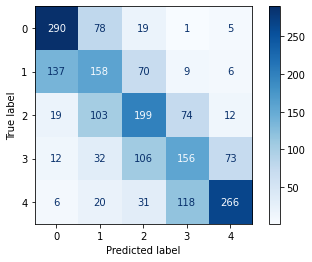

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(cnny_test_multi, y_pred), display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Below are my sources. Not everything has been directly taken from or has remained in this last version, but I did use them at some point. 

Sources: 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html

http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html

https://medium.com/swlh/word-embedding-word2vec-with-genism-nltk-and-t-sne-visualization-43eae8ab3e2e

https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html

https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook

https://stackoverflow.com/questions/32889929/gridsearchcv-scoring-parameter-using-scoring-f1-or-scoring-none-by-default-u

https://www.programcreek.com/python/example/104657/gensim.models.Word2Vec.load
https://www.programcreek.com/python/?CodeExample=get+embedding+matrix

https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/
https://cnvrg.io/cnn-sentence-classification/

https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

https://imdona.tistory.com/16

## My Report
***Non_Neral Models: ***
After preprocessing (which includes lowercasing, removing punctuation, filtering stopwords, and stemming) and mapping, my data went into Naive Bayes binary first. 

Note: Usually, 2 parameters are very close to each other. (1,2) and (1,3) which are the ngram ranges. So when you run, it might be one or the other, but usually, these are the results. As you can see from their printed results under their cells, those two hyperparameters usually yield very close probabilities. 

**Naïve Bayes: **

In my opinion, for multiclass predictions, it could’ve been better not to use GaussianNB because my multiclass data was pretty discrete, fit for MultinomialNB, so it wasn’t suprising to me the low accuracies I got in multiclass even though NB is known to be better for multiclass than say LR. It's supposed to compute probability of each class label normally then take argmax. 

BINARY: 
Best parameters set:

	vectorizer__min_df: 100

	vectorizer__ngram_range: (1, 3)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       773
           1       0.88      0.87      0.87       820

    accuracy                           0.87      1593
   macro avg       0.87      0.87      0.87      1593
weighted avg       0.87      0.87      0.87      1593

f1: 0.8687339656585656

accuracy: 0.8688010043942247

[[674  99]
 [110 710]]
**Bit too many false negatives for my liking, but nothing drastic. 

MULTI: 

Best parameters set:

	vectorizer__min_df: 500

	vectorizer__ngram_range: (1, 2)

f1: 0.47521079485214307

accuracy: 0.4905

[[255  93  20   8  17]

 [ 97 149  80  21  33]

 [ 44  80 121  94  68]

 [ 20  31  61 138 129]

 [ 24  14  18  67 318]]


**Logistic Regression: **

Since this is a classification problem, this also performed badly in multiclass, not surprisingly. Linear Regression couldn't have performed better because my outcome is dicrete. BUT logistic regression is not good at multiclass when there are more than 2 class labels. So the result is not unexpected. I could've used one-vs-rest or one-vs-one wrapper models or smth, but that was not the task. 

Best parameters set:

	logicmodel__l1_ratio: 0.5

	vectorizer__min_df: 100

	vectorizer__ngram_range: (1, 2)
  

[[709  64]

 [ 86 734]]

f1: 0.9058148444792009

accuracy: 0.9058380414312618


Best parameters set:

            logicmodel__l1_ratio: 0.5

            vectorizer__min_df: 100

            vectorizer__ngram_range: (1, 2)


        [[284  86  12   7   4]
         [ 87 182  81  15  15]
         [ 26  77 192  92  20]
         [  9  29  72 172  97]
         [ 11  10  20 113 287]]
        f1: 0.5547963023459538
        accuracy: 0.5585




***Neural Models: ***

I split both the binary and multiclass data into validation sets. I then turned everything into lists to have better access. I then created lists of sentences which were lists of words. Which is what I fed to my custom word2vec model. I tokenized X_train (it was of binary but they have the same words and sentences with multiclass so I thought it was fine). I turned my stuff into sequences, and padded them to 496 which was the max sequence length. 
Then I moved on to creating my embedding matrix. Then I downloaded a pretrained model “text8” and calculated another embedding matrix using that.

When it came time to train, I turned everything to numpy arrays. I created parameters that’d go into GridSearchCV. I have in total 6 models. For binary, I decided to use my validation set as validation for GridSearchCV rather than k-fold because it took forever. But for the multiclass, I just did a 1-fold. Also, for multiclass, I encoded my labels. 
I have to say, assigning custom weights and vectorizing my words did not have the effect I thought it would. Not that binary accuracies aren't high, it's just that there isn't much of a difference between them, and I'm not sure why. My best guess is I tuned those hyperparameters well, considering randomly init has better accuracy than pretrained. The fact that custom trained is the best in both categories(binary and multiclass) is not suprising. It'd be a shame for my efforts if it were not. 

BINARY
1.	Using custom word embeddings (Binary) 
Best parameters: 
{'density': 10, 'kernel_size': 7, 'num_filters': 128}  
Best Score : (This score is low for all because I didn’t use cross-validation apart from my validation set or 1-fold) 0.81
              precision    recall  f1-score   

           0       0.91      0.92      0.91       
           1       0.92      0.91      0.92       

    accuracy       0.91    
   macro avg       0.91          
weighted avg       0.91          

[[710  63]

[ 74 746]]


*These numbers are a bit rounded up. y_pred yields the probability results, which isn’t binary. So, if it’s bigger than 0.5, I said it’s a 1. If lower, it’s a 0. 

For this one only, I’ll calculate manually if they’re true. 

True positive = 710 

False negative = 74

False positive = 63

True negative = 746

Recall = tp/tp+fn = 710/710+74 = 0,905

Precision = tp/tp+fp = 710/710+63 = 0,918

F1 = 1/(1/P + 1/R) = 2PR/P+R = 1,638/(0,91+0,90) = 0,904

Accuracy = tp+tn/tp+fp+tn+fn = 1456/(710+63+74+746) = 0,91

This was both effective and efficient. Both the gridsearchcv and model training took very little time compared to the others, and the results are one of the best I’ve gotten. This isn’t suprising considering this is the custom word embedding one. 
2.	Using pre-trained word embeddings (Binary): 
Best params: {'density': 64, 'kernel_size': 3, 'num_filters': 128}
              precision    recall  f1-score   

           0       0.89      0.89      0.89      
           1       0.90      0.90      0.90      

    accuracy                           0.89      
   macro avg       0.89           
        

[[689  84]

 [ 85 735]]	

**Here we have less true positives more false pos/neg in general. But, the accuracy doesn’t decrease by much. 
3.	Using randomly initialized (Binary): 
Best Params: {'density': 32, 'kernel_size': 3, 'num_filters': 64}

              precision    recall  f1-score  

           0       0.89      0.92      0.90     
           1       0.92      0.89      0.90     

    accuracy                           0.90     
   macro avg       0.90      
weighted avg       0.90    

[[712  61]

[ 92 728]]

** Even though true pos/neg is not bad, false pos is more than ever before. I personally didn’t expect all 3 of these models to perform so closely to each other. Seems to me the embedding matrix didn’t make a huge difference. 

MULTICLASS

**In my tests before using gridsearchcv, I had a really big overfitting problem with multiclass. I’m hoping that is resolved now with the automated hyperparameter tuning. Because when I did it manually, I couldn’t solve the issue. And since the actual solution is to get more data which I cannot do, this is what I’ve gotten: 
**Also, additionally, I tried more parameters for multiclass. I had 100 as a parameter for dense layer and also, I tried dropout and tried to tune dropout rate but it always came out 0, and it never choose 100 and IT TOOK FOREVER. So, I gave up on those, the ones I have were good enough. 
4.	Custom (Multiclass) **The difference between embeddings is much more obvious in multiclass
Best Params: {'density': 64, 'kernel_size': 5, 'num_filters': 64}
                precision    recall  f1-score   

           0       0.73      0.69      0.71       
           1       0.49      0.50      0.49      
           2       0.53      0.43      0.48      
           3       0.41      0.44      0.43      
           4       0.64      0.72      0.68     

    accuracy                           0.56     
   macro avg       0.56      0.56      0.56      
weighted avg       0.56      0.56      0.56      

[[273  91  12   4  13]

 [ 76 191  82  18  13]

 [ 12  80 177 119  19]

 [  8  19  55 167 130]

 [  5  11  11  98 316]]

5.	Pretrained (Multiclass)
              precision    recall  f1-score   

           0       0.59      0.72      0.65       
           1       0.47      0.26      0.33      
           2       0.35      0.32      0.33      
           3       0.35      0.44      0.39      
           4       0.61      0.64      0.63       

    accuracy                           0.48      
   macro avg       0.47      0.47      0.46     
weighted avg       0.48      0.48      0.47    

[[282  47  46  13   5]

 [139  97  95  44   5]

 [ 47  50 129 147  34]

 [  8  10  61 168 132]

 [  4   3  39 114 281]]

6.	Random (Multiclass)
**This always took longest in GridSearchCV. 
              precision    recall  f1-score   

           0       0.62      0.74      0.68     
           1       0.40      0.42      0.41     
           2       0.47      0.49      0.48      
           3       0.44      0.41      0.42     
           4       0.73      0.60      0.66       
    accuracy                           0.53      
   macro avg       0.53      0.53      0.53      
weighted avg       0.54      0.53      0.53      

[[290  78  19   1   5]

 [137 158  70   9   6]

 [ 19 103 199  74  12]

 [ 12  32 106 156  73]

 [ 6  20  31 118 266]]

**There is, for sure, some overfitting in this one. Training accuracy is 0.74 and testing accuracy is 0.53. Like I said before, I haven't been able to fix it, and the truest way of fixing it is having more data, which I don't have. This is expected though, since this uses randomly initialized word embeddings, it needs more data. 
 **Overall, try as I might, I couldn't increase the multiclass accuracies. This isn't suprising, but I tried my best. 